In [ ]:
"""
Quick dataset visualizer for ACDC slices.

Shows random (image, label) pairs from the SegmentationDataset,
so you can verify normalization, resizing, and label alignment.
"""

import os
import torch
import sys
import matplotlib.pyplot as plt
import random
from torchvision.utils import make_grid

PROJECT_ROOT = "/mnt/hdd/ttoxopeus/basic_UNet"

if PROJECT_ROOT not in sys.path:
    sys.path.append(PROJECT_ROOT)
    print(f"✅ Added project root to sys.path:\n   {PROJECT_ROOT}")
else:
    print(f"ℹ️ Project root already in sys.path:\n   {PROJECT_ROOT}")

from src.training.data_loader import SegmentationDataset  # adjust if your path differs

✅ Added project root to sys.path:
   /media/ttoxopeus/basic_UNet


In [ ]:
# ============================================================
# --- USER CONFIGURATION ---
# ============================================================
IMG_DIR = "/mnt/hdd/ttoxopeus/datasets/nnUNet_raw/Dataset200_ACDC/imagesTr"
LBL_DIR = "/mnt/hdd/ttoxopeus/datasets/nnUNet_raw/Dataset200_ACDC/labelsTr"

num_samples = 4           # how many random slices to visualize
num_slices_per_volume = 30
target_size = (256, 256)
normalize = True
augment = False            # keep False for clean inspection
save_fig = False           # set True to save instead of showing
save_path = "sample_visuals.png"

# ============================================================
# --- LOAD DATASET ---
# ============================================================

dataset = SegmentationDataset(
    img_dir=IMG_DIR,
    lbl_dir=LBL_DIR,
    slice_axis=2,
    normalize=normalize,
    target_size=target_size,
    augment=augment,
    num_slices_per_volume=num_slices_per_volume,
)

print(f"✅ Loaded {len(dataset)} slices total from {len(dataset.img_paths)} volumes.")




✅ Loaded 1902 slices total from 200 volumes.


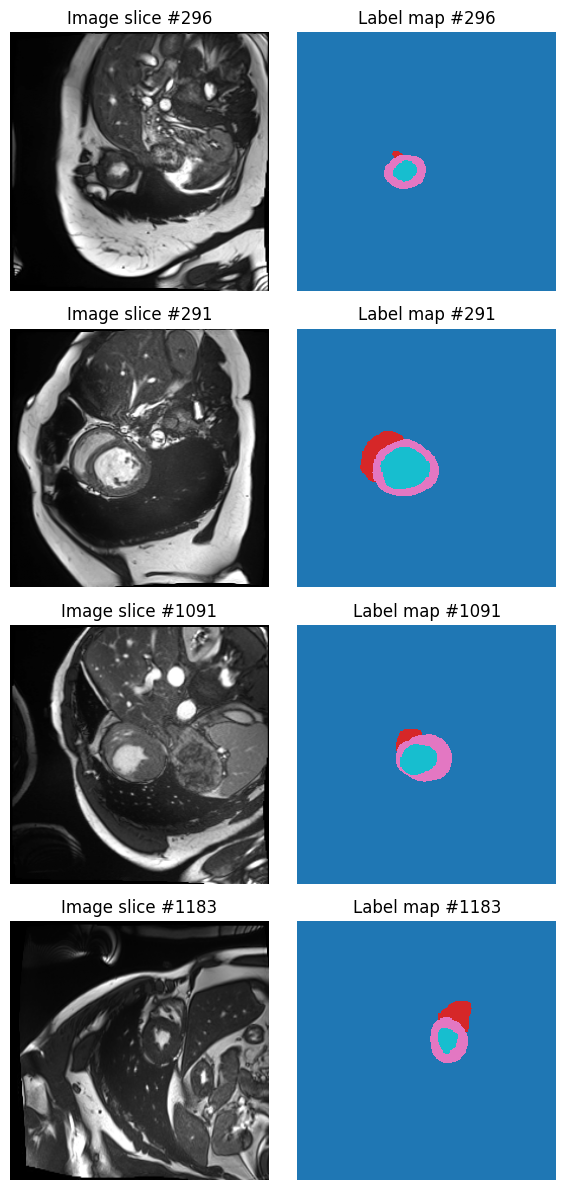

In [12]:
# ============================================================
# --- VISUALIZE RANDOM SAMPLES ---
# ============================================================

# pick random indices
indices = random.sample(range(len(dataset)), k=num_samples)

fig, axes = plt.subplots(num_samples, 2, figsize=(6, 3*num_samples))
if num_samples == 1:
    axes = [axes]  # handle single-row case

for ax_pair, idx in zip(axes, indices):
    img, lbl = dataset[idx]
    img_np = img.squeeze().numpy()
    lbl_np = lbl.numpy()

    # left: MRI slice, right: label map
    ax_pair[0].imshow(img_np, cmap="gray")
    ax_pair[0].set_title(f"Image slice #{idx}")
    ax_pair[0].axis("off")

    im = ax_pair[1].imshow(lbl_np, cmap="tab10", interpolation="nearest")
    ax_pair[1].set_title(f"Label map #{idx}")
    ax_pair[1].axis("off")

plt.tight_layout()

if save_fig:
    plt.savefig(save_path, dpi=150)
    print(f"💾 Saved visualization to {save_path}")
else:
    plt.show()
